## Lead Scoring Case Study

### Problem Statement

An education company named X Education gets a lot of leads, however, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify hot leads or potential leads, so that they can focus more on such leads and increase the lead conversion rate.

### Goal of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#### Approach: Perform the following steps to assign a lead score and identify potential leads:
1. Reading and understanding the data.
2. EDA - Univariate analysis, Handling missing values, Outlier Treatment, Bivariate analysis.
3. Data Preparation.
4. Test-Train Split.
5. Feature Scaling.
6. Building the logistic regression model.
7. Metrics.
8. ROC Curve.
9. Finding the optimal cutoff point.

## Step 1: Reading and Understanding the Data

Let us first import the necessary libraries and read the Leads dataset

In [917]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [918]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [919]:
#Font for graph labels, this is used for all graphs in this notebook
label_font = {"fontsize": 15, 
              "color" : "darkred",
             'weight': 'normal'}
#Font for graph title, this is used for all graphs in this notebook
title_font = {"fontsize": 15, 
              "color" : "darkred",
             'weight': 'normal'}

In [920]:
pd.set_option('display.max_columns', 500)

In [921]:
# Importing the dataset
df = pd.read_csv("leads.csv")

In [922]:
# Check the head of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [923]:
# Checking the dimensions of the dataframe
df.shape

(9240, 37)

In [924]:
#checking for type of each column and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All the datatypes are inferred correctly. We shall work with each feature to analyze and do feature engineering if required. We see there are some missing values which can be analyzed and treated.

## Step 2: EDA

### Checking columns with missing values

In [925]:
#Missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

There are 11 features with more than 25% of data missing, `Lead Quality` being the highest with 52%. We also notice a word ‘select’ in some of the features. This could be because the lead has not selected a value in the dropdown on the website (or elsewhere). The word select is not giving us any useful information and will be treated as missing value. 

There are four columns with the value 'Select' - `Specialization, How did you hear about X Education, Lead Profile, City`

In [926]:
#Treating 'Select' as missing
df = df.replace('Select', np.nan)

In [927]:
#Recalculating number of missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

The percentage of missing values has increased significantly
-	Specialization: 16% -> 37%
-	How did you hear about X Education: 24% -> 78%
-	Lead Profile: 29% -> 74%
-	City: 15% -> 40%

In [928]:
#Dropping columns with large number of missing values
df.drop(["How did you hear about X Education", "Lead Profile"],axis=1,inplace=True)
len(df.columns)

35

Lead Quality is the column with next highest missing values, but it seems to be an important feature to be dropped. We can analyze it further before acting on th emissing values. The data dictionary describes Lead quality as "Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead."

In [929]:
#Understanding lead quality
df['Lead Quality'].value_counts(dropna = False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [930]:
#Percantage of conversions with lead quality missing
(df.loc[df['Lead Quality'].isnull()].groupby('Converted').count()/df['Lead Quality'].isnull().sum()*100)[['Prospect ID']]

,Prospect ID
Converted,
0,78.518985
1,21.481015


In [931]:
#Percantage of conversions with lead quality Not Sure
(df.loc[df['Lead Quality']== "Not Sure"].groupby('Converted').count()/df['Lead Quality'].value_counts()['Not Sure']*100)[['Prospect ID']]

,Prospect ID
Converted,
0,75.641026
1,24.358974


Good percentage of leads with `missing Lead Quality` were converted successfully, a similar percentage of `Not Sure Lead Quality` were also converted successfully. Since the values of this column are filled with human intuition and because of the similarity of conversion numbers between missing and "Not Sure", one of the approaches to treat the missing values is to replace it with value "Not Sure"

In [932]:
#Imputing Lead Quality value to be Not Sure
df['Lead Quality'].fillna('Not Sure', inplace = True)
df['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

The columns with next highest missing values
- Asymmetrique Activity Index                      46.0
- Asymmetrique Profile Index                       46.0
- Asymmetrique Activity Score                      46.0
- Asymmetrique Profile Score                       46.0

The first thing noticeable here is, we have redundant information, scores seem to be derived from index columns or vice versa. So, we should be able to drop one of the pairs.

##### TODO: Understand these columns better to impute the values, or drop the columns

In [933]:
#Analysing if there is a pattern in missing values
df.groupby('Asymmetrique Profile Index').describe()[["Asymmetrique Activity Score", "Asymmetrique Profile Score"]]

Asymmetrique Activity Score                       \
                                                 count       mean       std   
Asymmetrique Profile Index                                                    
01.High                                         2203.0  14.059010  1.188487   
02.Medium                                       2788.0  14.502152  1.494517   
03.Low                                            31.0  14.258065  1.611785   

                                                         \
                            min   25%   50%   75%   max   
Asymmetrique Profile Index                                
01.High                     7.0  13.0  14.0  15.0  17.0   
02.Medium                   8.0  14.0  14.0  15.0  18.0   
03.Low                      9.0  13.5  15.0  15.0  16.0   

                           Asymmetrique Profile Score                       \
                                                count       mean       std   
Asymmetrique Profile Index                                                   
01.High                                        2203.0  18.128007  0.957760   
02.Medium                                      2788.0  14.987446  0.767234   
03.Low                                           31.0  11.709677  0.461414   

                                                          
                             min   25%   50%   75%   max  
Asymmetrique Profile Index                                
01.High                     17.0  17.0  18.0  19.0  20.0  
02.Medium                   13.0  15.0  15.0  15.0  16.0  
03.Low                      11.0  11.0  12.0  12.0  12.0

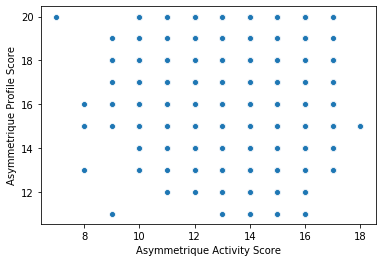

In [934]:
sns.scatterplot(x = "Asymmetrique Activity Score", y="Asymmetrique Profile Score", data = df)
plt.show()

Seems like there is no specific pattern with how the score is derived from index or between the activity and profile scores!
So it is hard to impute values that makes business sense.


In [935]:
#Dropping columns 
df.drop(["Asymmetrique Activity Index", "Asymmetrique Profile Index","Asymmetrique Activity Score",
         "Asymmetrique Profile Score"],axis=1,inplace=True)
len(df.columns)

31

In [936]:
#Recalculating number of missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

Next highest is `City`

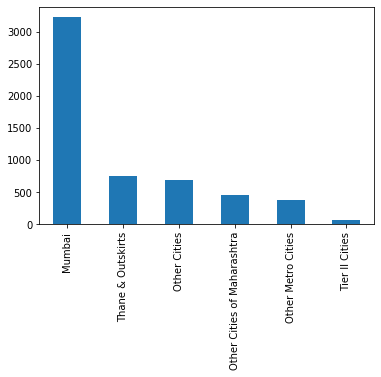

In [937]:
df['City'].value_counts().plot.bar()
plt.show()

'Mumbai' appears most frequently. We can check the feasibility of replacing the missing values with the mode. Also, an interesting thing to note here is majority of this data is from the state 'Maharashtra'

In [938]:
#Imputing missing values for City as mode value
mumbai_df = df['City'].fillna('Mumbai')
mumbai_df.value_counts()/mumbai_df.value_counts().sum()*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64


After imputing `City` city with mode value we can see 75% of the data is from Mumbai city and around 90% of the data is from Maharashtra. There is not much variance in this feature. So, imputing 40% of the values with the mode does not seem to be contributing towards the model because of lack of variance. Hence dropping this column.


In [939]:
#Dropping city 
df.drop(["City"],axis=1,inplace=True)
len(df.columns)

30

In [940]:
#Analysing Tags
df["Tags"].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Tags is described as 'Tags assigned to customers indicating the current status of the lead.' - It is a free text column filled by the sales agent calling. Again, like city column, imputing 36% of the values into mode value can adversely impact the model. Hence, we can bucket all the missing values into 'Unknown' category.

In [941]:
#Imputing Tags missing values
df["Tags"].fillna('Unknown', inplace = True)
df['Tags'].value_counts()['Unknown']

3353

In [942]:
#Analysing Tags
df["Specialization"].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Similar to `Tags`, missing values of `Specialization` can also be bucketed into 'Unknown' category.

In [943]:
#Imputing Specialization missing values
df["Specialization"].fillna('Unknown', inplace = True)
df['Specialization'].value_counts()['Unknown']

3380

In [944]:
#Recalculating number of missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [945]:
#Analysing What is your current occupation
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [946]:
#When 'What is your current occupation' is null, "What matters most to you in choosing a course" is also null
df[df['What is your current occupation'].isnull()].groupby('What matters most to you in choosing a course').count()[['Prospect ID']] 

,Prospect ID
What matters most to you in choosing a course,


In [947]:
df["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

With the given information about data, reason for the missing values of `What is your current occupation` and `What matters most to you in choosing a course` is not evident. Looking at the values of `What matters most to you in choosing a course` column, we can see very less variance in data and considering the percentage of missing values we can drop this column. Whereas `What is your current occupation` see to have good variance, Hence, we the bucket the missing values as 'Unknown'

In [948]:
#Imputing What is your current occupation missing values
df["What is your current occupation"].fillna('Unknown', inplace = True)
df['What is your current occupation'].value_counts()['Unknown']

2690

In [949]:
df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)
len(df.columns)

29

In [950]:
#Analysing Country
df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Sweden                     3
Belgium                    2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
China                      2
Italy                      2
Bangladesh                 2
Ghana                      2
Philippines                2
Indonesia                  1
Liberia                    1
Vietnam                    1
Malaysia                   1
Sri Lanka                  1
Russia        

In [951]:
#Percentage os data variance (India and missing value)
(df[(df['Country'].isnull()) | (df['Country'] == "India")].shape[0]/df.shape[0])*100

96.8939393939394

97% of the `Country` column is made-up of 'India' and missing value. Due to lack of variance we drop the column

In [952]:
#Drop country
df.drop(['Country'],axis=1,inplace=True)
len(df.columns)

28

In [953]:
#Recalculating number of missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [954]:
df.dropna(inplace = True)
df.shape

(9074, 28)

In [955]:
#Coulmns after missing value treatment
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We are left with 28 columns

### Outlier analysis

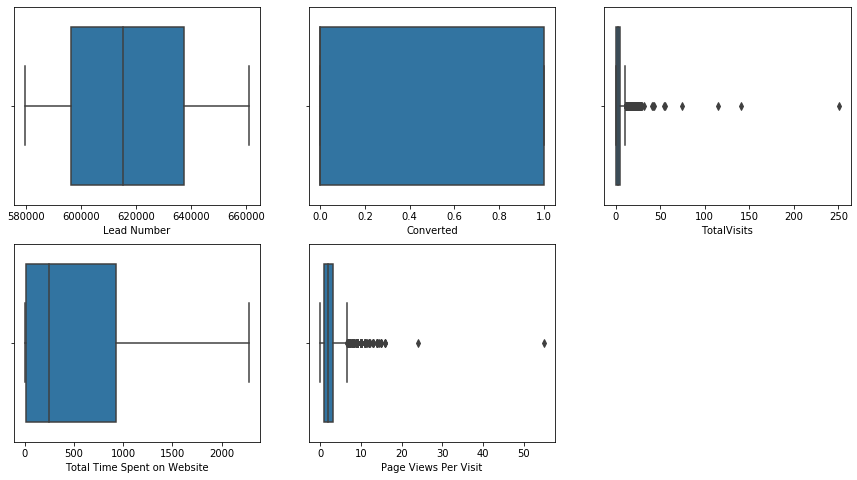

In [956]:
#Get all numeric columns
num_columns = df.select_dtypes(include=["int64", 'float64'])

#Boxplot of numeric columns
plt.figure(figsize=(15,8))
for i, col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
    
plt.show()
     

- `Lead number` and `Converted` look as expected
- `Total Time Spent on Website` do not have any outliers, however there are more number of datapoints above the median compared to the other end. There could be a trend here that can be used by the model.
- `TotalVisits` and `Page Views Per Visit` has outliers on the higher end. We can analyze these further and treat accordingly.

In [957]:
df["TotalVisits"].quantile([.25,.5,.70,.75,.80,.90,.95,.99,1])

0.25      1.0
0.50      3.0
0.70      4.0
0.75      5.0
0.80      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

We see a reasonable number up to 99 percentile. We can perform soft caping for treating outliers of `TotalVisits`

In [958]:
q3 = df["TotalVisits"].quantile(.99)
df[df["TotalVisits"] > q3]["TotalVisits"].value_counts()


18.0     15
20.0     12
19.0      9
21.0      6
23.0      6
24.0      5
25.0      5
27.0      5
22.0      3
28.0      2
26.0      2
29.0      2
32.0      1
74.0      1
141.0     1
55.0      1
41.0      1
30.0      1
43.0      1
54.0      1
115.0     1
251.0     1
42.0      1
Name: TotalVisits, dtype: int64

In [959]:
#Soft capping TotalVisits
df["TotalVisits"][df["TotalVisits"] > q3] = q3
df[df["TotalVisits"] > q3]["TotalVisits"].value_counts()

Series([], Name: TotalVisits, dtype: int64)

In [960]:
df["Page Views Per Visit"].quantile([.25,.5,.70,.75,.80,.90,.95,.99,1])

0.25     1.0
0.50     2.0
0.70     3.0
0.75     3.2
0.80     4.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

We see a similar trend with `Page Views Per Visit`, and soft capping can be used here also.

In [961]:
q3 = df["Page Views Per Visit"].quantile(.99)
df[df["Page Views Per Visit"] > q3]["Page Views Per Visit"].value_counts()

10.00    25
11.00    18
14.00     9
13.00     6
12.00     5
15.00     4
16.00     3
12.33     1
11.50     1
14.50     1
24.00     1
55.00     1
Name: Page Views Per Visit, dtype: int64

In [962]:
#Soft capping Page Views Per Visit
df["Page Views Per Visit"][df["Page Views Per Visit"] > q3] = q3
df[df["Page Views Per Visit"] > q3]["Page Views Per Visit"].value_counts()

Series([], Name: Page Views Per Visit, dtype: int64)

### Univariate and Bivariate analysis

In [963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [964]:
#Analysing prospect id and lead number
df[['Prospect ID', "Lead Number"]].head()

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681


Prospect ID and Lead Number are unique numbers assigned to each lead. This is not useful for the model we will build. Hence dropping `Prospect ID` and setting `Lead Number` as index.

In [965]:
df.drop(['Prospect ID'], inplace = True, axis = 1)
df.set_index("Lead Number", inplace = True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,No,No,Modified


In [966]:
#Get all categorical columns
categorical_cols = df.select_dtypes(include= ['object']).columns.values.tolist()
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

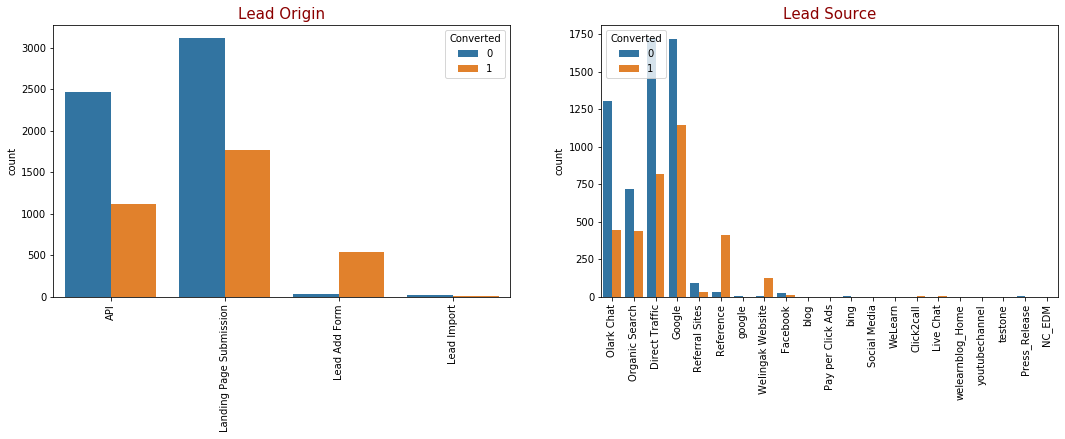

In [967]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[0:2]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()


**Inference**
- Lead Origin: More number of leads are originated from landing page submission
- Lead Source: Major percentage of lead source is Google and direct traffic


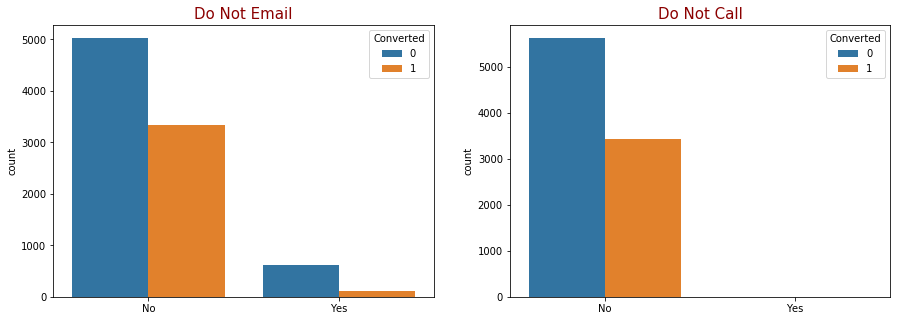

In [968]:
#Count plots
plt.figure(figsize=(15,5))
for i, col in enumerate(categorical_cols[2:4]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')
    
plt.show()

In [969]:
print((df["Do Not Email"].value_counts(dropna = False)/df.shape[0])*100)
print((df["Do Not Call"].value_counts(dropna = False)/df.shape[0])*100)

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64
No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64


**Inference**
What we note here is, very less variance in data. Both, `Do Not Email` and `Do Not Call` can be dropped because of lack of variance.

In [970]:
#Drop Do Not Call and Do Not Email
df.drop(["Do Not Call", "Do Not Email"], inplace = True, axis = 1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

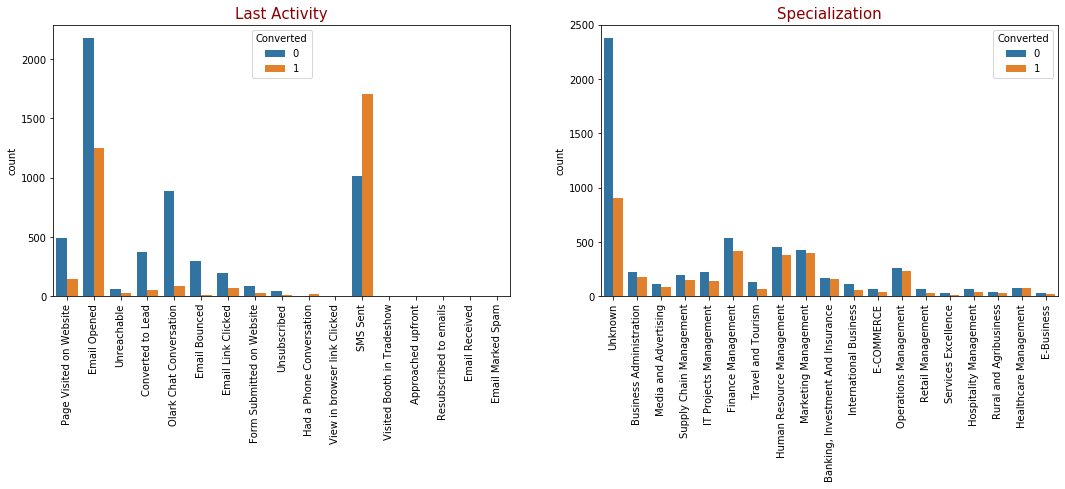

In [971]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[4:6]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()

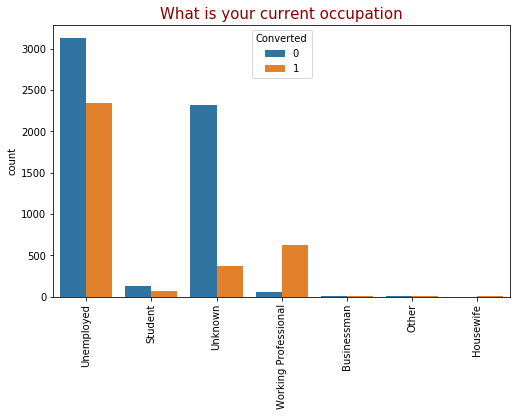

In [972]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[6:7]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()

In [973]:
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

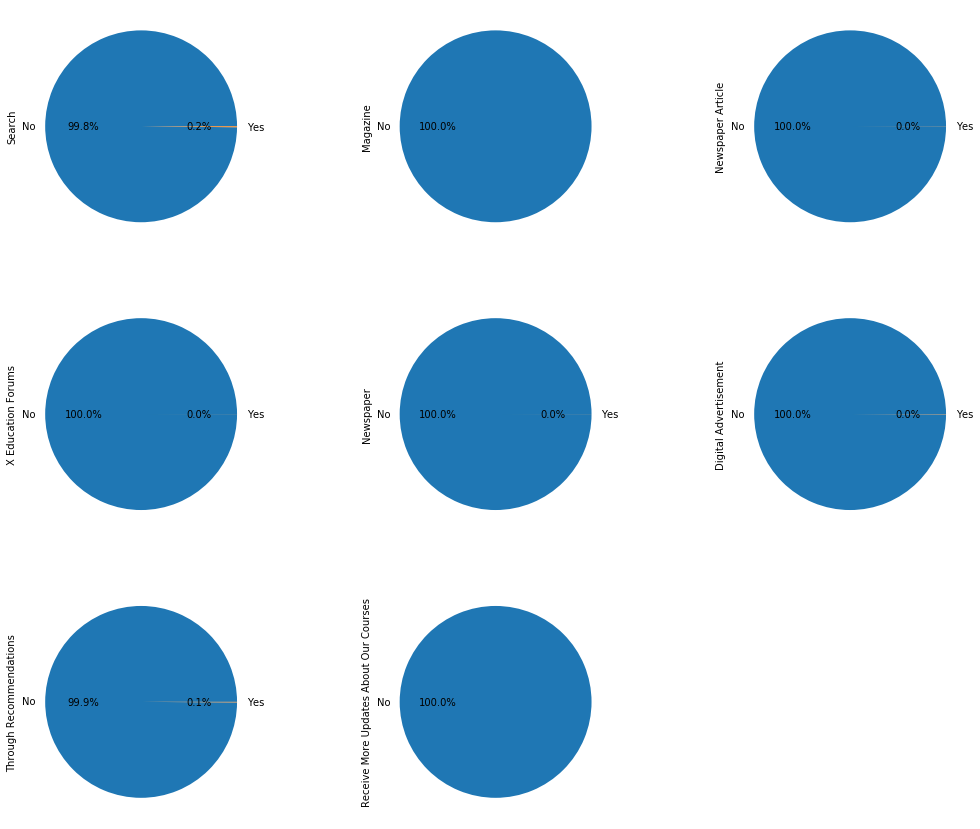

In [974]:
plt.figure(figsize=(18,15))
for i, col in enumerate (categorical_cols[7:15]):
    plt.subplot(3,3,i+1)
    #plt.title('Pie Plot for {}'.format(col))
    df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

All 8 columns are not useful!!!

##### todo: Should we drop them?!!!

In [975]:
df.drop(categorical_cols[7:15], inplace = True, axis = 1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

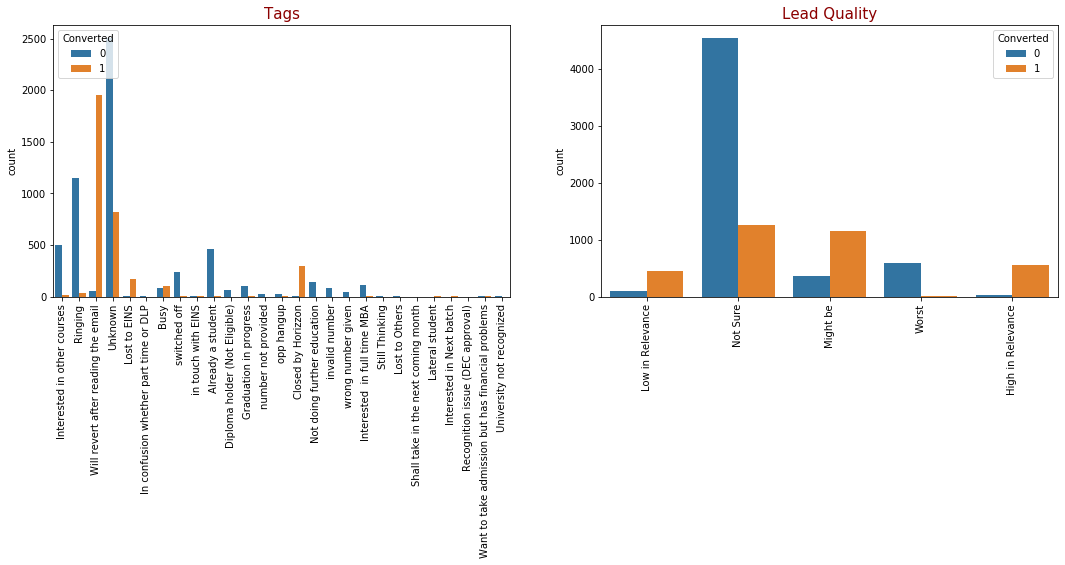

In [976]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[15:17]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()

Good variance

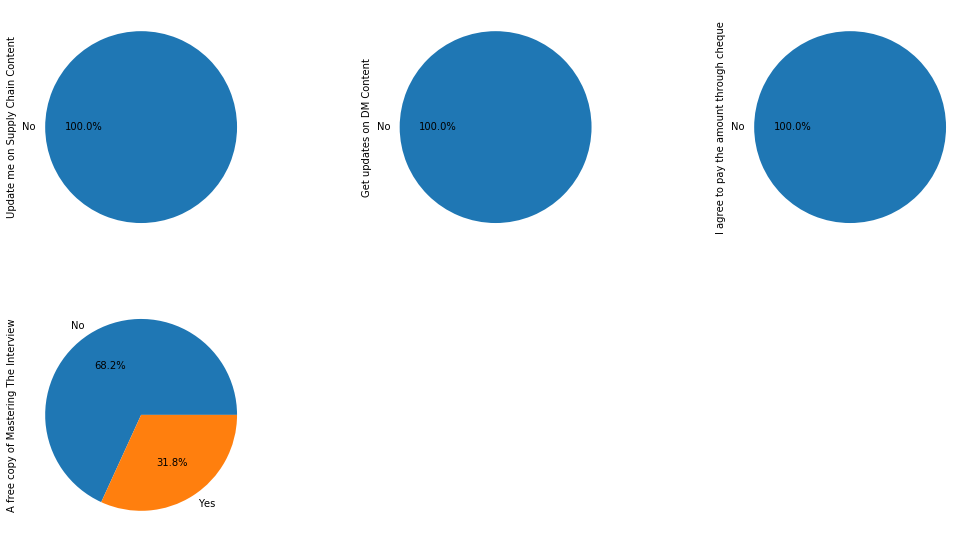

In [977]:
plt.figure(figsize=(18,15))
for i, col in enumerate (categorical_cols[17:21]):
    plt.subplot(3,3,i+1)
    #plt.title('Pie Plot for {}'.format(col))
    df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

First three are potential candidates to be dropped

In [978]:
df.drop(categorical_cols[17:20], inplace = True, axis = 1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

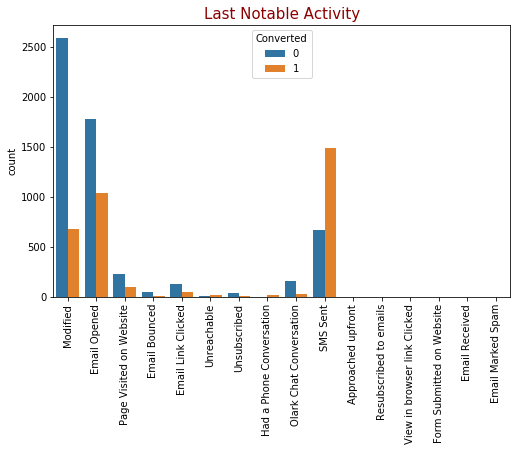

In [979]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[21:22]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()

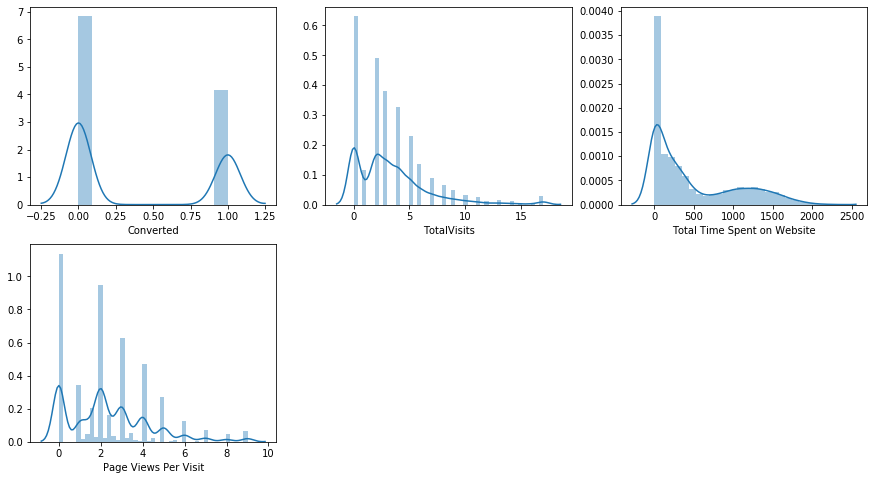

In [980]:
#Get all numeric columns
num_columns = df.select_dtypes(include=["int64", 'float64'])

#Distplot of numeric columns
plt.figure(figsize=(15,8))
for i, col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
    
plt.show()

All have good variance

In [981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 660737 to 579533
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  Lead Quality                            9074 non-null

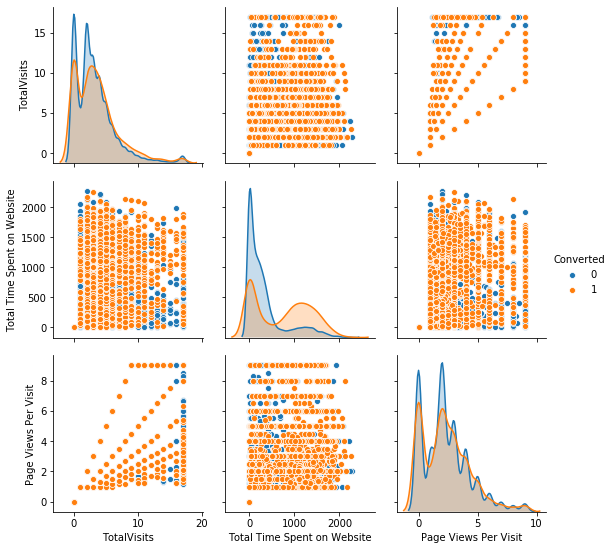

In [982]:
sns.pairplot(df, hue = 'Converted')
plt.show()

- Page Views per Visit and TotalVisits seem to have a strong correlation

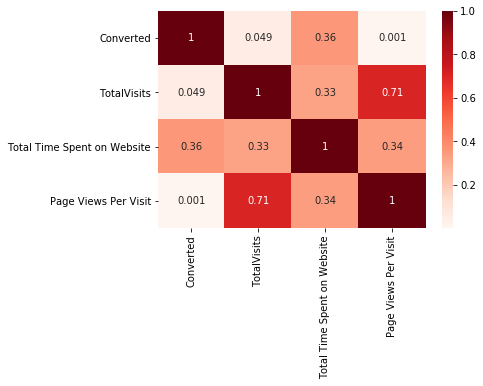

In [983]:
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.show()

## Step 3: Data Preparation

- Converting categorical binary variables (Yes/No) to 0/1.
- Creating dummy variables for categorical variables with multiple levels.

In [984]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Not Sure,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,Might be,No,Modified


In the dataset we have data generated at source like TotalVisits and Total Time Spent on WebSite, and we also have sales team generated data. We cannot rely on sales team generated data because we are trying to build a solution for the sales team. The data that will be fed into this model will only have source generated data and the predictions will help the sales team.

In [985]:
#Drop all sales team generated data columns
df.drop(['Tags', 'Lead Quality', "Last Activity", "Last Notable Activity" ], inplace = True, axis = 1)
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
Lead Number,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,No
660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,No
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Yes
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,No
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,No


#### Converting some binary variables (Yes/No) to 0/1

In [986]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Map the variable
df[['A free copy of Mastering The Interview']] = df[['A free copy of Mastering The Interview']].apply(binary_map)
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
Lead Number,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,0
660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,1
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [987]:
# Creating a dummy variable for categorical variables and dropping the first one.
dummies = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation']], drop_first=True)
dummies.shape

(9074, 47)


47 columns can be reduced further to build an effective model. While analyzing the variables we noticed there are a few features with some values occurring less frequently. We can group those values into one bucket and try to reduce the number of dummies created.
Lets try to buckt any value occurring less than 100 times into one bucket.

In [988]:
#Preparing Lead Origin
df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [989]:
df['Lead Origin'].replace(["Lead Import", "Quick Add Form"], "Others", inplace=True)
df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Others                       30
Name: Lead Origin, dtype: int64

In [990]:
dummies = pd.get_dummies(df['Lead Origin'], prefix = "Lead_Origin")
dummies.drop("Lead_Origin_Others", axis = 1, inplace = True)
# Adding the results to the master dataframe
df = pd.concat([df, dummies], axis=1)
df.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form
Lead Number,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,0,1,0,0
660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,0,1,0,0


In [991]:
#Preparing Lead Source
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [992]:

df['Lead Source'].replace(["Facebook" ,"bing","google","Click2call","Press_Release","Live Chat","Social Media","welearnblog_Home","NC_EDM",
"WeLearn","youtubechannel","Pay per Click Ads","testone","blog"], "Others", inplace=True)
df['Lead Source'].value_counts()


Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                59
Name: Lead Source, dtype: int64

In [993]:
dummies = pd.get_dummies(df['Lead Source'], prefix = "Lead_Source")
dummies.drop("Lead_Source_Others", axis = 1, inplace = True)
# Adding the results to the master dataframe
df = pd.concat([df, dummies], axis=1)
df.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website
Lead Number,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,0,1,0,0,0,0,1,0,0,0,0
660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,0,1,0,0,0,0,0,1,0,0,0


In [994]:
  
df["Specialization"].value_counts()

Unknown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

`Specialization` Seems to be fine

In [995]:
dummies = pd.get_dummies(df['Specialization'], prefix = "Specialization", drop_first = True)
# Adding the results to the master dataframe
df = pd.concat([df, dummies], axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       '

In [996]:
df["What is your current occupation"].value_counts()

Unemployed              5476
Unknown                 2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [997]:
df['What is your current occupation'].replace(["Other","Housewife","Businessman"], "Others", inplace=True)
df['What is your current occupation'].value_counts()

Unemployed              5476
Unknown                 2683
Working Professional     677
Student                  206
Others                    32
Name: What is your current occupation, dtype: int64

In [998]:
dummies = pd.get_dummies(df['What is your current occupation'], prefix = "Occupation")
dummies.drop("Occupation_Others", axis = 1, inplace = True)
# Adding the results to the master dataframe
df = pd.concat([df, dummies], axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       '

In [999]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 660737 to 579533
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Converted                                 9074 non-null   int64  
 3   TotalVisits                               9074 non-null   float64
 4   Total Time Spent on Website               9074 non-null   int64  
 5   Page Views Per Visit                      9074 non-null   float64
 6   Specialization                            9074 non-null   object 
 7   What is your current occupation           9074 non-null   object 
 8   A free copy of Mastering The Interview    9074 non-null   int64  
 9   Lead_Origin_API                           9074 non-null   uint8  
 10  Lead_Origin_Landing Page Subm

In [1000]:
df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation'], inplace = True, axis = 1)

In [1001]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 660737 to 579533
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9074 non-null   int64  
 1   TotalVisits                               9074 non-null   float64
 2   Total Time Spent on Website               9074 non-null   int64  
 3   Page Views Per Visit                      9074 non-null   float64
 4   A free copy of Mastering The Interview    9074 non-null   int64  
 5   Lead_Origin_API                           9074 non-null   uint8  
 6   Lead_Origin_Landing Page Submission       9074 non-null   uint8  
 7   Lead_Origin_Lead Add Form                 9074 non-null   uint8  
 8   Lead_Source_Direct Traffic                9074 non-null   uint8  
 9   Lead_Source_Google                        9074 non-null   uint8  
 10  Lead_Source_Olark Chat       

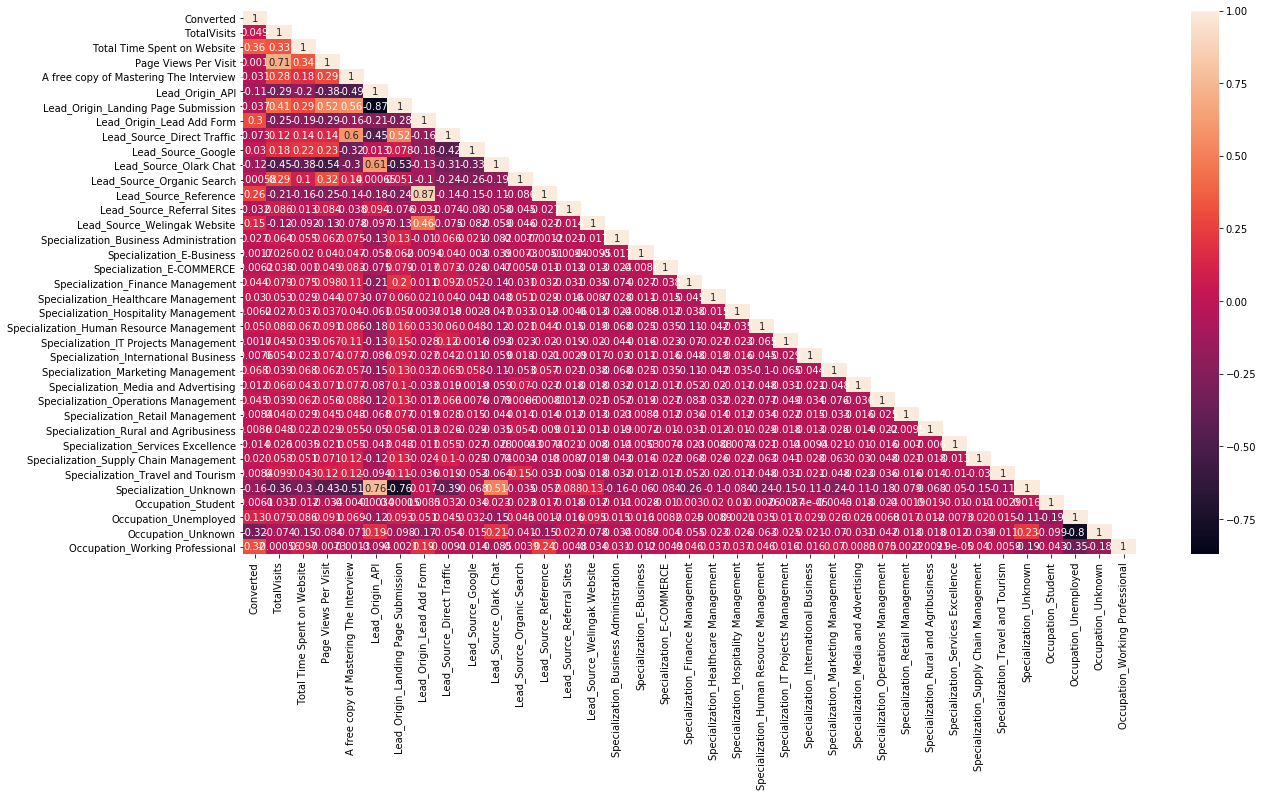

In [1002]:
# Correlation matrix 
cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(cor,annot = True, mask = mask)
plt.show()

There are far too many variables for heatmap to make sense. We have 37 columns. We can start working with these columns to build a model, the then reduce the number of columns based the metrics achieved.

### Test-Train Split

In [1003]:
from sklearn.model_selection import train_test_split

In [1004]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
660728,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
660727,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
660719,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
660681,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [1005]:
# Putting response variable to y
y = df['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [1006]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [1007]:
from sklearn.preprocessing import MinMaxScaler

In [1008]:
#Creating the scaler object
scaler = MinMaxScaler()
#Scale
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
630949,0.117647,0.178347,0.222222,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
649355,0.117647,0.085355,0.222222,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
579735,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
614238,0.117647,0.619946,0.222222,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
588625,0.294118,0.711590,0.277778,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


###  Model Building

In [1009]:
import statsmodels.api as sm

In [1010]:
# Logistic regression model number 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2832.4
Date:                Sat, 09 Jan 2021   Deviance:                       5664.7
Time:                        00:17:10   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.7403      0.756      0.979      0.327      -0.741       2.222
TotalVisits                                  1.0320      0.242      4.258      0.000       0.557       1.507
Total Time Spent on Website                  4.5968      0.160     28.649      0.000       4.282       4.911
Page Views Per Visit                        -0.5103      0.243     -2.101      0.036      -0.986      -0.034
A free copy of Mastering The Interview      -0.1257      0.103     -1.219      0.223      -0.328       0.076
Lead_Origin_API                             -0.6173      0.778     -0.793      0.428      -2.142       0.908
Lead_Origin_Landing Page Submission         -1.2683      0.774     -1.639      0.101      -2.785       0.248
Lead_Origin_Lead Add Form                    0.9524      1.043      0.913      0.361      -1.093       2.997
Lead_Source_Direct Traffic                  -0.5039      0.619     -0.813      0.416      -1.718       0.710
Lead_Source_Google                          -0.1508      0.617     -0.245      0.807      -1.359       1.058
Lead_Source_Olark Chat                       0.8948      0.625      1.431      0.153      -0.331       2.121
Lead_Source_Organic Search                  -0.3114      0.622     -0.501      0.616      -1.529       0.907
Lead_Source_Reference                        1.6978      0.960      1.769      0.077      -0.183       3.579
Lead_Source_Referral Sites                  -0.7270      0.698     -1.042      0.298      -2.095       0.641
Lead_Source_Welingak Website                 3.9842      1.179      3.380      0.001       1.674       6.294
Specialization_Business Administration      -0.3239      0.235     -1.378      0.168      -0.785       0.137
Specialization_E-Business                   -0.1290      0.419     -0.308      0.758      -0.951       0.693
Specialization_E-COMMERCE                   -0.1558      0.336     -0.464      0.643      -0.814       0.502
Specialization_Finance Management           -0.2791      0.195     -1.429      0.153      -0.662       0.104
Specialization_Healthcare Management        -0.2857      0.301     -0.950      0.342      -0.875       0.304
Specialization_Hospitality Management       -0.8800      0.351     -2.510      0.012      -1.567      -0.193
Specialization_Human Resource Management    -0.3716      0.198     -1.880      0.060      -0.759       0.016
Specialization_IT Projects Management       -0.2532      0.234     -1.084      0.279      -0.711       0.205
Specialization_International Business       -0.3989      0.286     -1.395      0.163      -0.959       0.162
Specialization_Marketing Management         -0.2223      0.199     -1.114      0.265      -0.613       0.169
Specialization_Media and Advert

As we can see we have a lot of features with a significantly high p value. We can use RFE to reduce dimensionality before proceeding.

### Feature Selection Using RFE

In [1011]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [1012]:

logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [1013]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 12),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Source_Direct Traffic', False, 5),
 ('Lead_Source_Google', False, 9),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 8),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', True, 1),
 ('Lead_Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 15),
 ('Specialization_E-Business', False, 22),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_Finance Management', False, 16),
 ('Specialization_Healthcare Management', False, 18),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 19),
 ('Specialization_I

In [1014]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management', 'Occupation_Student',
       'Occupation_Unemployed'],
      dtype='object')

In [1015]:
#Second model with reduced dimentionality
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.4
Date:                Sat, 09 Jan 2021   Deviance:                       5700.9
Time:                        00:17:12   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2639      0.465     -0.568      0.570      -1.175       0.647
TotalVisits                               0.8030      0.204      3.942      0.000       0.404       1.202
Total Time Spent on Website               4.5826      0.159     28.751      0.000       4.270       4.895
Lead_Origin_API                          -0.9050      0.476     -1.903      0.057      -1.837       0.027
Lead_Origin_Landing Page Submission      -1.7640      0.472     -3.741      0.000      -2.688      -0.840
Lead_Origin_Lead Add Form                 0.9353      1.048      0.892      0.372      -1.119       2.990
Lead_Source_Olark Chat                    1.1925      0.124      9.609      0.000       0.949       1.436
Lead_Source_Reference                     1.7488      0.965      1.812      0.070      -0.143       3.640
Lead_Source_Referral Sites               -0.5383      0.333     -1.618      0.106      -1.190       0.114
Lead_Source_Welingak Website              4.0194      1.183      3.398      0.001       1.701       6.338
Specialization_Hospitality Management    -0.5590      0.308     -1.814      0.070      -1.163       0.045
Specialization_Services Excellence       -0.7065      0.601     -1.176      0.240      -1.885       0.471
Specialization_Travel and Tourism        -0.4343      0.231     -1.878      0.060      -0.888       0.019
Specialization_Unknown                   -0.8961      0.119     -7.521      0.000      -1.130      -0.663
Occupation_Unknown                       -1.3097      0.084    -15.561      0.000      -1.475      -1.145
Occupation_Working Professional           2.3796      0.182     13.056      0.000       2.022       2.737
=========================================================================================================
"""

#### Checking VIFs

In [1016]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1017]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead_Origin_Lead Add Form,62.62
6,Lead_Source_Reference,48.08
8,Lead_Source_Welingak Website,15.50
2,Lead_Origin_API,7.16
12,Specialization_Unknown,4.74
3,Lead_Origin_Landing Page Submission,3.73
0,TotalVisits,3.09
5,Lead_Source_Olark Chat,2.50
1,Total Time Spent on Website,2.36
13,Occupation_Unknown,1.60


`Lead_Origin_Lead Add Form` has a high VIF. we can start by dropping `Lead_Origin_Lead Add Form`

In [1018]:
col = col.drop('Lead_Origin_Lead Add Form', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Specialization_Unknown',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [1019]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.8
Date:                Sat, 09 Jan 2021   Deviance:                       5701.7
Time:                        00:17:12   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0771      0.408     -0.189      0.850      -0.878       0.723
TotalVisits                               0.8036      0.204      3.944      0.000       0.404       1.203
Total Time Spent on Website               4.5844      0.159     28.769      0.000       4.272       4.897
Lead_Origin_API                          -1.0931      0.419     -2.606      0.009      -1.915      -0.271
Lead_Origin_Landing Page Submission      -1.9514      0.415     -4.697      0.000      -2.766      -1.137
Lead_Source_Olark Chat                    1.1946      0.124      9.633      0.000       0.952       1.438
Lead_Source_Reference                     2.4974      0.460      5.433      0.000       1.596       3.398
Lead_Source_Referral Sites               -0.5377      0.333     -1.616      0.106      -1.190       0.114
Lead_Source_Welingak Website              4.7680      0.825      5.781      0.000       3.151       6.384
Specialization_Hospitality Management    -0.5591      0.308     -1.815      0.070      -1.163       0.045
Specialization_Services Excellence       -0.7065      0.601     -1.175      0.240      -1.884       0.472
Specialization_Travel and Tourism        -0.4343      0.231     -1.878      0.060      -0.888       0.019
Specialization_Unknown                   -0.8961      0.119     -7.525      0.000      -1.130      -0.663
Occupation_Unknown                       -1.3101      0.084    -15.566      0.000      -1.475      -1.145
Occupation_Working Professional           2.3786      0.182     13.049      0.000       2.021       2.736
=========================================================================================================
"""

In [1020]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_API,7.13
11,Specialization_Unknown,4.72
3,Lead_Origin_Landing Page Submission,3.73
0,TotalVisits,3.09
4,Lead_Source_Olark Chat,2.49
1,Total Time Spent on Website,2.36
12,Occupation_Unknown,1.60
13,Occupation_Working Professional,1.24
5,Lead_Source_Reference,1.18
7,Lead_Source_Welingak Website,1.17


`Lead_Origin_API` has high VIF value.

In [1021]:
col = col.drop('Lead_Origin_API', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Specialization_Unknown',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [1022]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.0
Date:                Sat, 09 Jan 2021   Deviance:                       5708.0
Time:                        00:17:12   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0890      0.136     -7.992      0.000      -1.356      -0.822
TotalVisits                               0.7513      0.203      3.708      0.000       0.354       1.148
Total Time Spent on Website               4.5458      0.158     28.735      0.000       4.236       4.856
Lead_Origin_Landing Page Submission      -0.9114      0.120     -7.576      0.000      -1.147      -0.676
Lead_Source_Olark Chat                    1.1489      0.122      9.386      0.000       0.909       1.389
Lead_Source_Reference                     3.5300      0.238     14.806      0.000       3.063       3.997
Lead_Source_Referral Sites               -0.5507      0.332     -1.659      0.097      -1.201       0.100
Lead_Source_Welingak Website              5.8158      0.722      8.056      0.000       4.401       7.231
Specialization_Hospitality Management    -0.5633      0.308     -1.828      0.067      -1.167       0.041
Specialization_Services Excellence       -0.7167      0.601     -1.193      0.233      -1.894       0.461
Specialization_Travel and Tourism        -0.4361      0.231     -1.887      0.059      -0.889       0.017
Specialization_Unknown                   -0.9330      0.119     -7.861      0.000      -1.166      -0.700
Occupation_Unknown                       -1.3126      0.084    -15.617      0.000      -1.477      -1.148
Occupation_Working Professional           2.3763      0.182     13.035      0.000       2.019       2.734
=========================================================================================================
"""

We still have some variables with high p-value, let us also calculate VIF again.

In [1023]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_Landing Page Submission,2.75
0,TotalVisits,2.61
10,Specialization_Unknown,2.42
1,Total Time Spent on Website,2.05
3,Lead_Source_Olark Chat,1.87
11,Occupation_Unknown,1.58
12,Occupation_Working Professional,1.21
4,Lead_Source_Reference,1.13
6,Lead_Source_Welingak Website,1.08
5,Lead_Source_Referral Sites,1.05


We have all the VIF values with in limit. Event though the P-Values are little higher let us calculate the accuracy of the 4th model we built

In [1024]:
y_train_pred = res.predict(X_train_sm).values
y_train_pred[:10]

array([0.08211363, 0.47982782, 0.29460482, 0.39974398, 0.81081018,
       0.54631613, 0.04021989, 0.86902896, 0.90550038, 0.75860291])

In [1025]:
#Creating a dataframe with the converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.082114,630949
1,0,0.479828,649355
2,0,0.294605,579735
3,1,0.399744,614238
4,1,0.810810,588625


In [1026]:
#Let's consider 0.5 as the cut off value to start with
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.082114,630949,0
1,0,0.479828,649355,0
2,0,0.294605,579735,0
3,1,0.399744,614238,0
4,1,0.810810,588625,1


In [1027]:
from sklearn import metrics

In [1028]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7973547472838923


This seems to be good accuracy for the given business problem, let us try to refine this further.`Specialization_Services Excellence` has the highest P-Value

In [1029]:
col = col.drop('Specialization_Services Excellence', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism', 'Specialization_Unknown',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [1030]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.8
Date:                Sat, 09 Jan 2021   Deviance:                       5709.5
Time:                        00:17:13   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0945      0.136     -8.036      0.000      -1.361      -0.828
TotalVisits                               0.7539      0.203      3.723      0.000       0.357       1.151
Total Time Spent on Website               4.5469      0.158     28.746      0.000       4.237       4.857
Lead_Origin_Landing Page Submission      -0.9105      0.120     -7.570      0.000      -1.146      -0.675
Lead_Source_Olark Chat                    1.1492      0.122      9.389      0.000       0.909       1.389
Lead_Source_Reference                     3.5295      0.238     14.806      0.000       3.062       3.997
Lead_Source_Referral Sites               -0.5515      0.332     -1.663      0.096      -1.202       0.099
Lead_Source_Welingak Website              5.8165      0.722      8.057      0.000       4.401       7.231
Specialization_Hospitality Management    -0.5593      0.308     -1.816      0.069      -1.163       0.044
Specialization_Travel and Tourism        -0.4325      0.231     -1.871      0.061      -0.886       0.020
Specialization_Unknown                   -0.9281      0.119     -7.826      0.000      -1.161      -0.696
Occupation_Unknown                       -1.3127      0.084    -15.621      0.000      -1.477      -1.148
Occupation_Working Professional           2.3725      0.182     13.023      0.000       2.015       2.730
=========================================================================================================
"""

In [1031]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_Landing Page Submission,2.74
0,TotalVisits,2.61
9,Specialization_Unknown,2.42
1,Total Time Spent on Website,2.05
3,Lead_Source_Olark Chat,1.87
10,Occupation_Unknown,1.58
11,Occupation_Working Professional,1.21
4,Lead_Source_Reference,1.13
6,Lead_Source_Welingak Website,1.08
5,Lead_Source_Referral Sites,1.05


In [1032]:
y_train_pred = res.predict(X_train_sm).values
y_train_pred[:10]

array([0.08181074, 0.47906707, 0.29455083, 0.39889571, 0.81035999,
       0.54547659, 0.04006327, 0.86902394, 0.90526599, 0.75797173])

In [1033]:
y_train_pred_final['Converted_Prob'] = y_train_pred
#Let's consider 0.5 as the cut off value to start with
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.081811,630949,0
1,0,0.479067,649355,0
2,0,0.294551,579735,0
3,1,0.398896,614238,0
4,1,0.810360,588625,1


In [1034]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7976696583215241


No significant increase

In [1035]:
col = col.drop('Lead_Source_Referral Sites', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Welingak Website',
       'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism', 'Specialization_Unknown',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [1036]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.2
Date:                Sat, 09 Jan 2021   Deviance:                       5712.5
Time:                        00:17:13   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1046      0.136     -8.125      0.000      -1.371      -0.838
TotalVisits                               0.7287      0.202      3.614      0.000       0.333       1.124
Total Time Spent on Website               4.5516      0.158     28.775      0.000       4.242       4.862
Lead_Origin_Landing Page Submission      -0.8970      0.120     -7.481      0.000      -1.132      -0.662
Lead_Source_Olark Chat                    1.1685      0.122      9.581      0.000       0.929       1.407
Lead_Source_Reference                     3.5453      0.238     14.883      0.000       3.078       4.012
Lead_Source_Welingak Website              5.8365      0.722      8.085      0.000       4.422       7.251
Specialization_Hospitality Management    -0.5570      0.308     -1.808      0.071      -1.161       0.047
Specialization_Travel and Tourism        -0.4341      0.232     -1.875      0.061      -0.888       0.020
Specialization_Unknown                   -0.9383      0.118     -7.928      0.000      -1.170      -0.706
Occupation_Unknown                       -1.3129      0.084    -15.630      0.000      -1.478      -1.148
Occupation_Working Professional           2.3689      0.182     12.997      0.000       2.012       2.726
=========================================================================================================
"""

In [1037]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_Landing Page Submission,2.73
0,TotalVisits,2.58
8,Specialization_Unknown,2.39
1,Total Time Spent on Website,2.05
3,Lead_Source_Olark Chat,1.86
9,Occupation_Unknown,1.58
10,Occupation_Working Professional,1.20
4,Lead_Source_Reference,1.13
5,Lead_Source_Welingak Website,1.08
7,Specialization_Travel and Tourism,1.04


In [1038]:
y_train_pred = res.predict(X_train_sm).values
y_train_pred[:10]

array([0.08188592, 0.47582143, 0.29433446, 0.39962667, 0.81024091,
       0.54534296, 0.04001317, 0.86685147, 0.90526992, 0.75861324])

In [1039]:
y_train_pred_final['Converted_Prob'] = y_train_pred
#Let's consider 0.5 as the cut off value to start with
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.081886,630949,0
1,0,0.475821,649355,0
2,0,0.294334,579735,0
3,1,0.399627,614238,0
4,1,0.810241,588625,1


In [1040]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7968823807274446


No improvement

In [1041]:
#confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3446,  459],
       [ 831, 1615]], dtype=int64)

In [1042]:
# Actual/Predicted     not_churn    churn
        # not_churn        3772      133
        # churn            284       2162  

In [1043]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1044]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6602616516762061

In [1045]:
# Let us calculate specificity
TN / float(TN+FP)

0.8824583866837388

In [1046]:
# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.1175416133162612


In [1047]:
# positive predictive value 
print (TP / float(TP+FP))

0.7786885245901639


In [1048]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8057049333645079


### Plotting the ROC Curve

In [1049]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

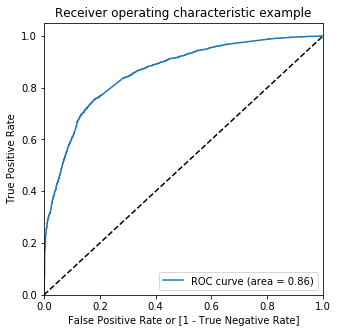

In [1050]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [1051]:
# Different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.081886,630949,0,1,0,0,0,0,0,0,0,0,0
1,0,0.475821,649355,0,1,1,1,1,1,0,0,0,0,0
2,0,0.294334,579735,0,1,1,1,0,0,0,0,0,0,0
3,1,0.399627,614238,0,1,1,1,1,0,0,0,0,0,0
4,1,0.810241,588625,1,1,1,1,1,1,1,1,1,1,0


In [1052]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.506692  0.986509  0.206146
0.2   0.2  0.696898  0.901881  0.568502
0.3   0.3  0.787120  0.768602  0.798720
0.4   0.4  0.799402  0.715045  0.852241
0.5   0.5  0.796882  0.660262  0.882458
0.6   0.6  0.781924  0.569092  0.915237
0.7   0.7  0.760038  0.470155  0.941613
0.8   0.8  0.737364  0.366721  0.969526
0.9   0.9  0.707133  0.251431  0.992574


<Figure size 576x576 with 0 Axes>

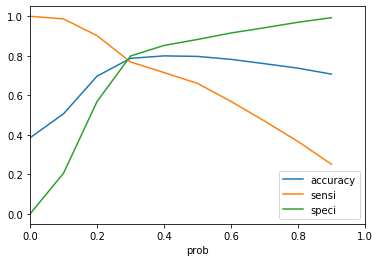

In [1056]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (8,8))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlim([0.0, 1.0])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1057]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.081886,630949,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.475821,649355,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.294334,579735,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.399627,614238,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.810241,588625,1,1,1,1,1,1,1,1,1,1,0,1


In [1059]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7871201385608566

In [1061]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3119,  786],
       [ 566, 1880]], dtype=int64)

In [1062]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1063]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7686017988552739

In [1064]:
# Let us calculate specificity
TN / float(TN+FP)

0.7987195902688861

In [1065]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.20128040973111397


In [1066]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7051762940735183


In [1067]:
# Negative predictive value
print (TN / float(TN+ FN))

0.84640434192673
